In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [3]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
database = client['linq_database']
collection = database['linq_take_home']

In [4]:
documents = collection.find()
df= pd.DataFrame(list(documents))

In [5]:
df.head()

,_id,category,value,timestamp
0,681f7b73b2ae6ecab03fc5f3,Linq Card,54.43,2025-04-13 10:35:43.603
1,681f7b73b2ae6ecab03fc5f4,Linq Card,23.58,2025-04-16 10:15:43.603
2,681f7b73b2ae6ecab03fc5f5,Linq Card,20.48,2025-05-07 10:48:43.603
3,681f7b73b2ae6ecab03fc5f6,Linq Card Metal,58.96,2025-05-04 11:04:43.603
4,681f7b73b2ae6ecab03fc5f7,Linq Card Metal,29.88,2025-04-16 10:38:43.603


In [6]:
df.shape

(1000, 4)

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,_id,category,value,timestamp
0,681f7b73b2ae6ecab03fc5f3,Linq Card,54.43,2025-04-13 10:35:43.603
1,681f7b73b2ae6ecab03fc5f4,Linq Card,23.58,2025-04-16 10:15:43.603
2,681f7b73b2ae6ecab03fc5f5,Linq Card,20.48,2025-05-07 10:48:43.603
3,681f7b73b2ae6ecab03fc5f6,Linq Card Metal,58.96,2025-05-04 11:04:43.603
4,681f7b73b2ae6ecab03fc5f7,Linq Card Metal,29.88,2025-04-16 10:38:43.603


In [15]:
df['category'].value_counts()

category
Linq Hub            190
Linq Card           180
Linq Card Custom    167
Linq Card Metal     161
Linq MiniCard       159
Linq Badge          143
Name: count, dtype: int64

In [21]:
#extract the date from the timestamp
df['date'] = df['timestamp'].dt.date

#extrac month
df['month'] = df['timestamp'].dt.month
df.head()

,_id,category,value,timestamp,date,month
0,681f7b73b2ae6ecab03fc5f3,Linq Card,54.43,2025-04-13 10:35:43.603,2025-04-13,4
1,681f7b73b2ae6ecab03fc5f4,Linq Card,23.58,2025-04-16 10:15:43.603,2025-04-16,4
2,681f7b73b2ae6ecab03fc5f5,Linq Card,20.48,2025-05-07 10:48:43.603,2025-05-07,5
3,681f7b73b2ae6ecab03fc5f6,Linq Card Metal,58.96,2025-05-04 11:04:43.603,2025-05-04,5
4,681f7b73b2ae6ecab03fc5f7,Linq Card Metal,29.88,2025-04-16 10:38:43.603,2025-04-16,4


In [13]:
#group category by value
category_summary = df.groupby("category")["value"].sum().sort_values(ascending=False)
category_summary

category
Linq Hub            7070.20
Linq Card           6275.92
Linq Card Custom    5928.89
Linq Card Metal     5774.78
Linq MiniCard       5603.40
Linq Badge          5266.01
Name: value, dtype: float64

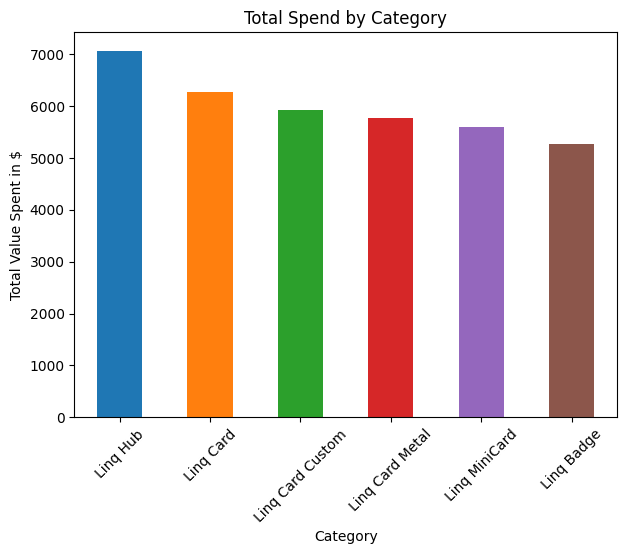

In [19]:
colors = plt.cm.tab10(range(len(category_summary)))
plt.figure(figsize=(7, 5))
category_summary.plot(kind="bar", color=colors)
plt.title("Total Spend by Category")
plt.xlabel("Category")
plt.ylabel("Total Value Spent in $")
plt.xticks(rotation=45)
plt.show()

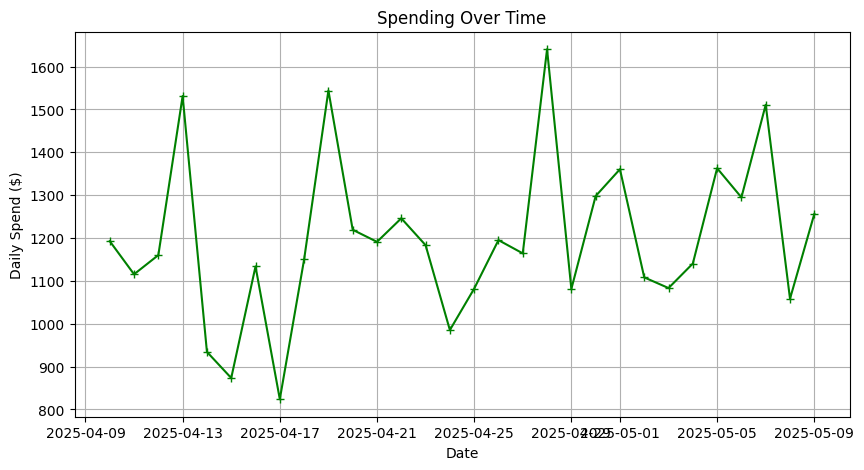

In [31]:
daily_summary = df.groupby("date")["value"].sum()
plt.figure(figsize=(10, 5))
daily_summary.plot(kind="line", marker="+", color="green")
plt.title("Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Spend ($)")
plt.grid(True)
plt.show()